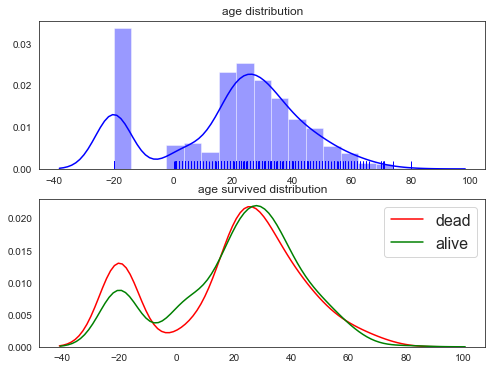

In [37]:
import os
#數據處理
import pandas as pd
import numpy as np
import random
import sklearn.preprocessing as preprocessing
#可視化
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#機器學習
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import (GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier, RandomForestRegressor)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from scipy import stats
#數據讀入
train = pd.read_csv('/Users/bella/titanic/train.csv')
test = pd.read_csv('/Users/bella/titanic/test.csv')

#觀察年齡，缺失資料以-20填補
fig, axes = plt.subplots(2,1,figsize=(8,6))
sns.set_style('white')
sns.distplot(train.Age.fillna(-20), rug=True, color='b', ax=axes[0])

ax0 =axes[0]
ax0.set_title('age distribution')
ax0.set_xlabel('')
#觀察年齡與存活之關係
ax1 = axes[1]
ax1.set_title('age survived distribution')
k1 = sns.distplot(train[train.Survived == 0].Age.fillna(-20), hist=False, color='r', ax=ax1, label='dead')
k2 = sns.distplot(train[train.Survived == 1].Age.fillna(-20), hist=False, color='g', ax=ax1, label='alive')
ax1.set_xlabel('')

ax1.legend(fontsize=16)

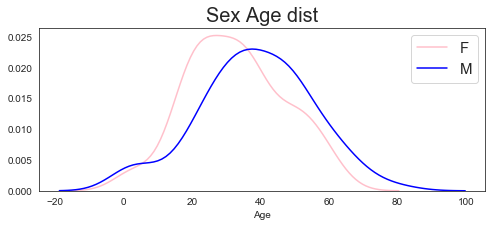

In [35]:
#男女比例分佈
f, ax = plt.subplots(figsize=(8,3))
ax.set_title('Sex Age dist', size=20)
sns.distplot(train[train.Sex =='female'].dropna().Age, hist=False, color='pink', label='F')
sns.distplot(train[train.Sex == 'male'].dropna().Age, hist=False, color='blue', label='M')
ax.legend(fontsize=15)

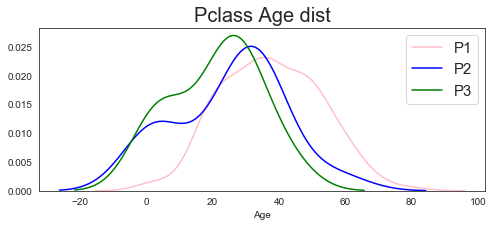

In [34]:
#艙等與年齡關係
f ,ax = plt.subplots(figsize=(8,3))
ax.set_title('Pclass Age dist', size=20)
sns.distplot(train[train.Pclass ==1].dropna().Age, hist=False, color='pink', label='P1')
sns.distplot(train[train.Pclass ==2].dropna().Age, hist=False, color='blue', label='P2')
sns.distplot(train[train.Pclass ==3].dropna().Age, hist=False, color='g',label='P3')
ax.legend(fontsize=15)

Text(0.5, 1.0, 'Pclass Surveved count')

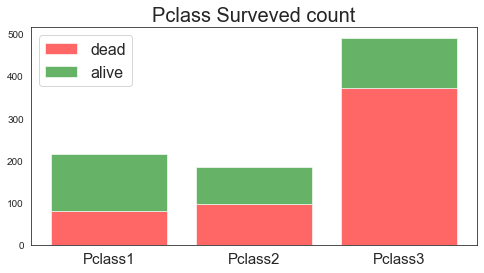

In [32]:
#艙等與存活率關係
y_dead = train[train.Survived==0].groupby('Pclass')['Survived'].count().values
y_alive = train[train.Survived==1].groupby('Pclass')['Survived'].count().values
pos= [1, 2, 3]
ax = plt.figure(figsize=(8,4)).add_subplot(111)
ax.bar(pos, y_dead, color='red', alpha=0.6, label='dead')
ax.bar(pos, y_alive, bottom=y_dead, color='green', alpha=0.6, label='alive')
ax.legend(fontsize=16, loc='best')

ax.set_xticks(pos)
ax.set_xticklabels(['Pclass%d'%(i) for i in range(1,4)], size=15)
ax.set_title('Pclass Surveved count', size = 20)

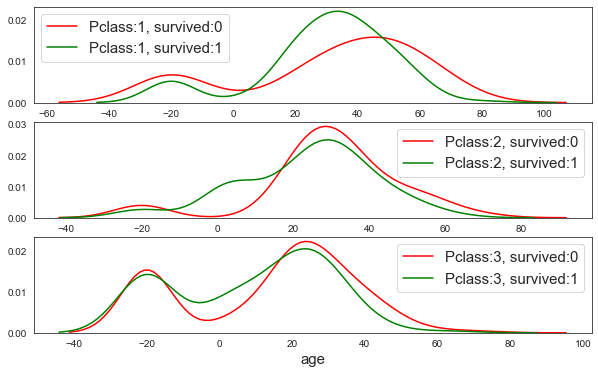

In [23]:
#針對個別艙等分析存活者年齡
pos = range(0,6)
age_list = []
for Pclass_ in range(1,4):
    for Survived_ in range(0,2):
        age_list.append(train[(train.Pclass == Pclass_)&(train.Survived == Survived_)].Age.fillna(-20).values)
fig, axes = plt.subplots(3,1,figsize=(10,6))
i_Pclass = 1
for ax in axes:
    sns.distplot(age_list[i_Pclass*2-2], hist=False, ax=ax, label='Pclass:%d, survived:0'%(i_Pclass), color='r')
    sns.distplot(age_list[i_Pclass*2-1], hist=False, ax=ax, label='Pclass:%d, survived:1'%(i_Pclass), color='g')
    i_Pclass += 1
    ax.set_xlabel('age', size=15)

    ax.legend(fontsize=15)


In [24]:
#男女數量
print(train.Sex.value_counts())
print('===============================')
#男女生存機率
print(train.groupby('Sex')['Survived'].mean())

male      577
female    314
Name: Sex, dtype: int64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


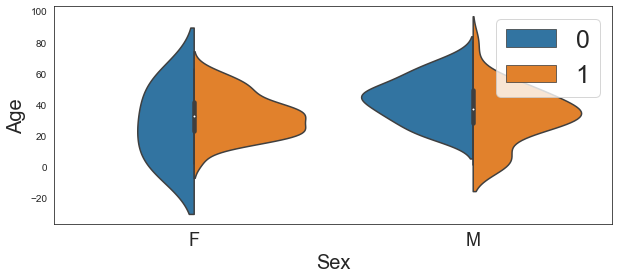

In [36]:
#存活者之男女年齡分佈
ax = plt.figure(figsize=(10, 4)).add_subplot(111)
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train.dropna(), split=True)
ax.set_xlabel('Sex', size=20)
ax.set_xticklabels(['F','M'], size=18)
ax.set_ylabel('Age',size=20)
ax.legend(fontsize=25,loc='best')

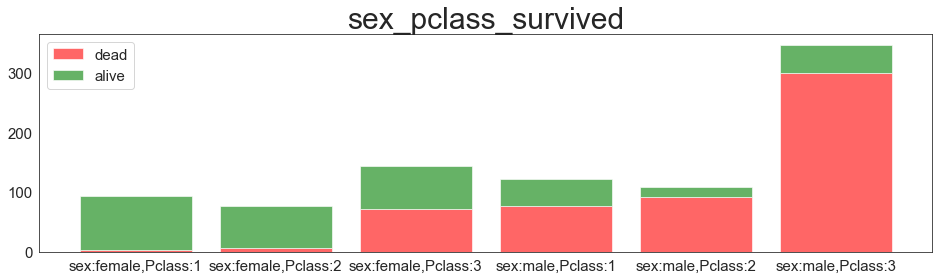

In [28]:
#根據艙等，不同性別之存活率
label = []
for sex_i in ['female','male']:
    for pclass_i in range(1,4):
        label.append('sex:%s,Pclass:%d'%(sex_i, pclass_i))
pos = range(6)
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(111)
ax.bar(pos,
      train[train['Survived'] == 0].groupby(['Sex','Pclass'])['Survived'].count().values,
      color='r',
      alpha=0.6,
      align='center',
      tick_label=label,
      label='dead')
ax.bar(pos,
      train[train['Survived'] == 1].groupby(['Sex','Pclass'])['Survived'].count().values,
      bottom=train[train['Survived']==0].groupby(['Sex','Pclass'])['Survived'].count().values,
      color='g',
      alpha=0.6,
      align='center',
      tick_label=label,
      label='alive')
ax.tick_params(labelsize=15)
ax.set_title('sex_pclass_survived' , size=30)
ax.legend(fontsize=15, loc='best')